In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [2]:
files = sorted(glob.glob("../files/data/*4mmstep*"))
print(files)

pressure_5bar_hits  = pd.read_hdf(files[2], "MC/hits")
pressure_10bar_hits = pd.read_hdf(files[0], "MC/hits")
pressure_15bar_hits = pd.read_hdf(files[1], "MC/hits")

pressure_5bar_part  = pd.read_hdf(files[2], "MC/particles")
pressure_10bar_part = pd.read_hdf(files[0], "MC/particles")
pressure_15bar_part = pd.read_hdf(files[1], "MC/particles")

['../files/data/ATPC_0nuBB_10bar_4mmstep.h5', '../files/data/ATPC_0nuBB_15bar_4mmstep.h5', '../files/data/ATPC_0nuBB_5bar_4mmstep.h5']


In [3]:
def GetStepSize(hits, part):

    part_primary_1 = part[part.particle_id == 1]
    part_primary_2 = part[part.particle_id == 2]
    vertex = part_primary_1[["initial_x", "initial_y", "initial_z"]].to_numpy()

    length_1 = part_primary_1["length"].to_numpy()
    length_2 = part_primary_2["length"].to_numpy()

    primary_1 = hits[ (hits.particle_id == 1) & (hits.hit_id == 0)]
    primary_2 = hits[ (hits.particle_id == 2) & (hits.hit_id == 0)]


    primary_1 = primary_1[["x", "y", "z"]].to_numpy()
    primary_2 = primary_2[["x", "y", "z"]].to_numpy()

    dist_1 = np.linalg.norm(primary_1 - vertex, axis = 1)
    dist_2 = np.linalg.norm(primary_2 - vertex, axis = 1)

    dist = (dist_1 + dist_2)/2.0 
    tot_length = np.add(length_1, length_2)

    return np.array(dist), np.array(tot_length)

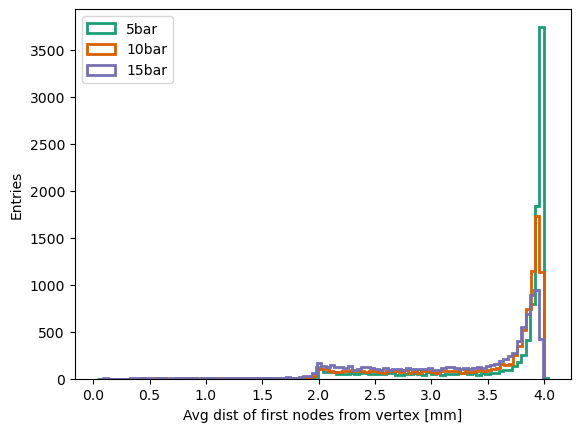

In [8]:
dist_5bar, length_5bar   = GetStepSize(pressure_5bar_hits, pressure_5bar_part)
dist_10bar, length_10bar = GetStepSize(pressure_10bar_hits, pressure_10bar_part)
dist_15bar, length_15bar = GetStepSize(pressure_15bar_hits, pressure_15bar_part)

plt.hist(dist_5bar, bins = 100, histtype ="step", label = "5bar", linewidth = 2);
plt.hist(dist_10bar, bins = 100, histtype ="step", label = "10bar", linewidth = 2);
plt.hist(dist_15bar, bins = 100, histtype ="step", label = "15bar", linewidth = 2);
plt.xlabel("Avg dist of first nodes from vertex [mm]")
plt.ylabel("Entries")
plt.legend(loc = "upper left")
# plt.semilogy()

Text(0, 0.5, 'Entries')

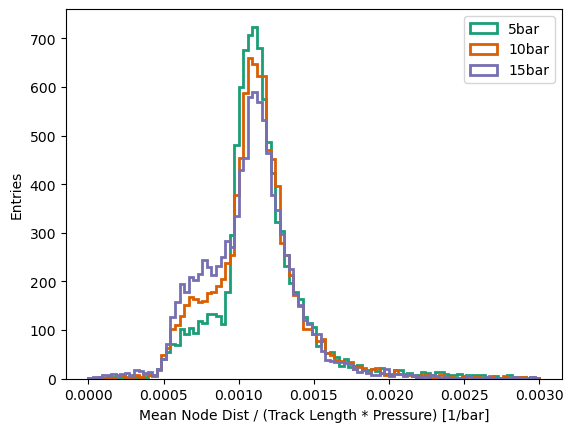

In [5]:
plt.figure()

plt.hist(dist_5bar/(length_5bar*5), histtype ="step", bins = np.linspace(0, 0.003, 100), linewidth = 2, label = "5bar");
plt.hist(dist_10bar/(length_10bar*10), histtype ="step", bins = np.linspace(0, 0.003, 100), linewidth = 2, label = "10bar");
plt.hist(dist_15bar/(length_15bar*15), histtype ="step", bins = np.linspace(0, 0.003, 100), linewidth = 2, label = "15bar");
plt.legend()
plt.xlabel("Mean Node Dist / (Track Length * Pressure) [1/bar]")
plt.ylabel("Entries")
# plt.semilogy()


Text(0, 0.5, 'Entries')

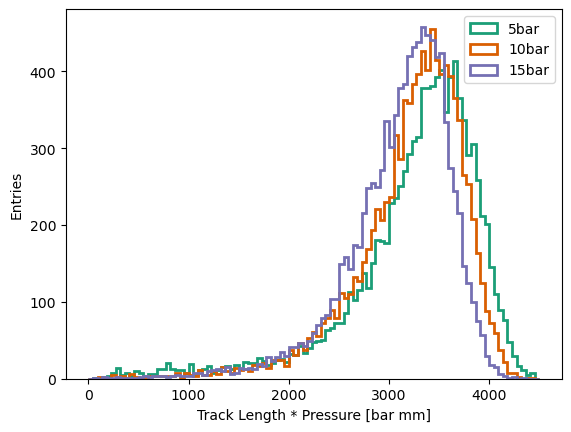

In [6]:
plt.figure()

plt.hist(length_5bar*5, histtype ="step", bins = np.linspace(0,4500, 100) ,linewidth = 2, label = "5bar");
plt.hist(length_10bar*10, histtype ="step", bins = np.linspace(0,4500, 100) ,linewidth = 2, label = "10bar");
plt.hist(length_15bar*15, histtype ="step", bins = np.linspace(0,4500, 100) ,linewidth = 2, label = "15bar");
plt.legend()
plt.xlabel("Track Length * Pressure [bar mm]")
plt.ylabel("Entries")
# plt.semilogy()